In [1]:
# Criando as bibliotecas
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
from datetime import datetime
from datetime import timedelta
import json
import requests
import pandas as pd
import numpy as np
import tqdm
import warnings
import csv

In [12]:
df = pd.read_csv('./covid19.csv', header=None)

x = df[0].to_numpy()
y = df[1].to_numpy()

X =  x.reshape(len(y), 1)
y =  y.reshape(len(y), 1)

.
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

fig = plt.figure(figsize=(7,7))
plt.plot(x, y, 'b.')
plt.xlabel('Casos iniciais',  fontsize=14)
plt.ylabel('Casos atuais',  fontsize=14)
plt.show()

SyntaxError: invalid syntax (<ipython-input-12-a331a08e9878>, line 9)

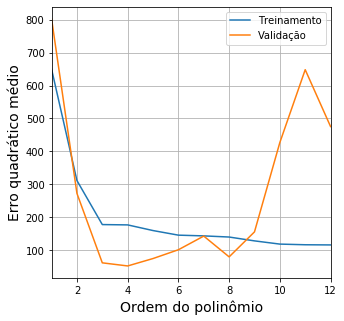

In [14]:
include_bias = False
error_train = []
error_val = []
mean_vec = []
std_vec = []
for d in range(1, 13):
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    
    std_scaler = StandardScaler()
   
    lin_reg = LinearRegression()

    
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    
    polynomial_regression.fit(x_train, y_train)
    
    y_train_predict = polynomial_regression.predict(x_train)
    
    y_val_predict = polynomial_regression.predict(x_val)    
    
    error_train.append(np.sqrt(mean_squared_error(y_train, y_train_predict)))

    error_val.append(np.sqrt(mean_squared_error(y_val, y_val_predict)))


plt.figure(figsize=(5, 5))
plt.plot(range(1, 13), error_train, label='Treinamento')
plt.plot(range(1, 13), error_val, label='Validação')
plt.xlabel('Ordem do polinômio',  fontsize=14)
plt.ylabel('Erro quadrático médio',  fontsize=14)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()


plt.show()

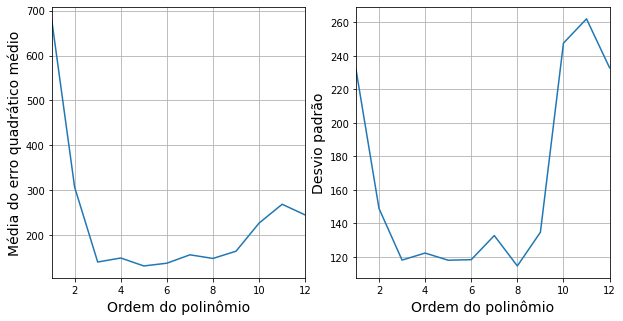

In [15]:

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

error_train = []
error_val = []
mean_vec = []
std_vec = []
for d in range(1, 13):
   
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
   
    std_scaler = StandardScaler()
   
    lin_reg = LinearRegression()

    
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, X, y, scoring='neg_mean_squared_error', cv=kfold)
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())


plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, 13), mean_vec)
plt.xlabel('Ordem do polinômio',  fontsize=14)
plt.ylabel('Média do erro quadrático médio',  fontsize=14)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.grid()

ax = plt.subplot(1, 2, 2)
plt.plot(range(1, 13), std_vec)
plt.xlabel('Ordem do polinômio',  fontsize=14)
plt.ylabel('Desvio padrão',  fontsize=14)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.grid()


plt.show()

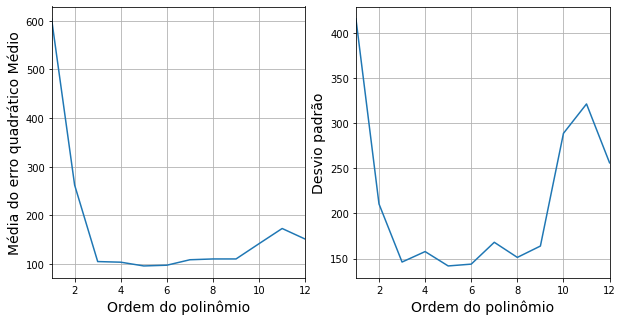

In [16]:


loocv = LeaveOneOut()

mean_vec = []
std_vec = []
for d in range(1, 13):
    
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
   
    std_scaler = StandardScaler()
   
    lin_reg = LinearRegression()

   
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, X, y, scoring='neg_mean_squared_error', cv=loocv)
        
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())
    

plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, 13), mean_vec)
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média do erro quadrático Médio', fontsize=14)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.grid()

ax = plt.subplot(1, 2, 2)
plt.plot(range(1, 13), std_vec)
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Desvio padrão', fontsize=14)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.grid()


plt.show()

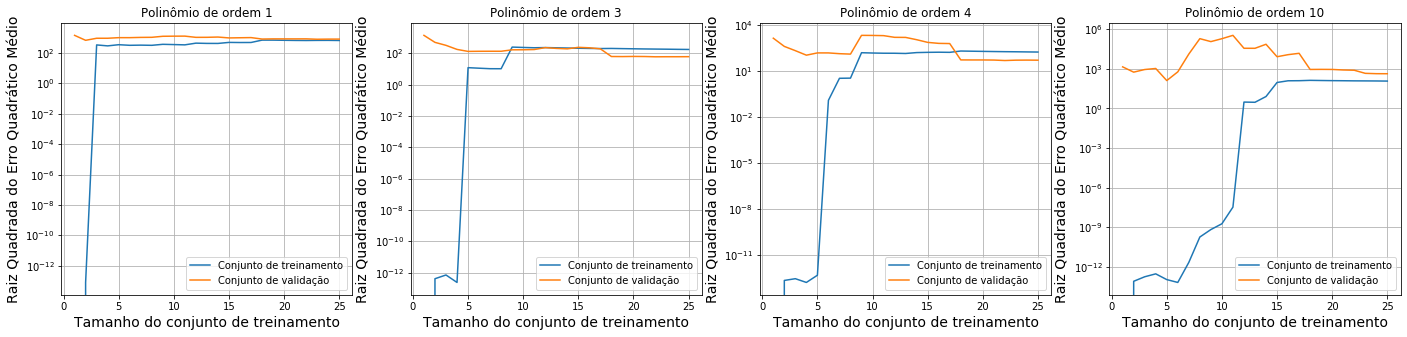

In [19]:
degrees = [1, 3, 4, 10]

plt.figure(figsize=(24, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

   
    poly_features = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
  
    std_scaler = StandardScaler()
   
    lin_reg = LinearRegression()

    
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    error_training = []
    error_validation = []
    error_test = []
    for m in range(1,len(x_train)+1):

        # Regressor.
        polynomial_regression.fit(x_train[:m], y_train[:m])

    
        y_train_predict = polynomial_regression.predict(x_train[:m])

        y_val_predict = polynomial_regression.predict(x_val)       

    
        error_training.append(mean_squared_error(y_train[:m], y_train_predict))

        error_validation.append(mean_squared_error(y_val, y_val_predict))     

    plt.plot(range(1,len(x_train)+1), np.sqrt(error_training), label='Conjunto de treinamento')
    plt.plot(range(1,len(x_train)+1), np.sqrt(error_validation), label='Conjunto de validação')
    plt.yscale('log')
    plt.xlabel('Tamanho do conjunto de treinamento', fontsize=14)
    plt.ylabel('Raiz Quadrada do Erro Quadrático Médio', fontsize=14)
    plt.grid()
    plt.title('Polinômio de ordem '+str(degrees[i]))
    plt.legend(loc='best')
    

plt.show()

In [18]:

degree = 3
include_bias = False


poly_features = PolynomialFeatures(degree=degree, include_bias=include_bias)
# O que padronizara as novas features
std_scaler = StandardScaler()
# Começando o regressor linear
lin_reg = LinearRegression()

model = Pipeline([
    ("poly_features", poly_features),
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg),
])


model.fit(X, y)


X_pred = np.arange(1, 70).reshape(-1, 1)
y_pred = model.predict(X_pred)
X_pred = X_pred.reshape(1, -1)[0]

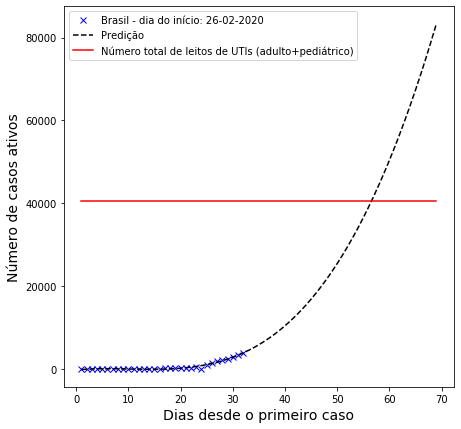

In [8]:
plt.figure(figsize=(7, 7))
plt.plot(X,y,'bx',label='Brasil - dia do início: 26-02-2020')
plt.plot(X_pred,y_pred,'k--',label='Predição')
plt.plot(X_pred,40600*np.ones(len(X_pred)),'r',label='Número total de leitos de UTIs (adulto+pediátrico)')
plt.xlabel('Dias desde o primeiro caso', fontsize=14)
plt.ylabel('Número de casos ativos', fontsize=14)
plt.legend()
plt.show()

In [9]:

dia_ate_colapso_de_leitos = min([i+1 for i,v in enumerate(y_pred) if v >= 40600])
print('dia_ate_colapso_de_leitos: ', dia_ate_colapso_de_leitos)

dia_ate_colapso_de_leitos:  57
